# Machine Learning to predict share prices in the Oil & Gas Industry

In a nutshell, this is a quick introduction **to understand the potential of data science and machine learning used in the oil industry**. I have chosen to work with the stock price of a few oil companies (or oil service company) and the oil price dataset as an example. Just to be clear, the intention is *not* to provide an analysis of the current situation in the oil industry. The main objectives here are to show the potential and **give you the tools to create your own view** of the markets and apply it to other problems or even industries.

In the low price world, reducing costs, saving time and improving safety are crucial outcomes that can be benefited from using machine learning in oil and gas operations. Find below a quick list with a few of the applications of data analysis and machine learning in the Oil & Gas upstream industry:

* Optimization of valve settings in smart wells to maximize NPV.
* Machine Learning based rock type classification
* Big data analysis on wells downtime.
* Data-driven production monitoring.
* Identifications of patterns using multiple variables during exploration phase.
* Reservoir modelling and history matching using the power of pattern recognition.
* Drilling rig automation.
* Additional opportunities where gather large volumes of information in real-time or by using multiple analogs.
* Deep learning to improve the efficiency and safety of hydraulic fracturing.
* Provide more intelligence at the wellhead.
* Integrated asset modeling optimization using machine-learning based proxy models.

I have tailored a quick exercise on how to use artificial intelligence using oil price and share price of a few companies. The notebook will focus on loading data and doing some illustrative data visualisations along the way. I will then use linear regression, cluster analysis and Random Forest to create a model predicting the share price in the short term.

I have been using data analysis and machine learning in different tasks in my current and previous jobs as a Reservoir Engineer. **Excel is the most common tool** for any type of analysis in the industry. However, it is certainly limited to basic data analysis, manipulation and to construct predictive models. We understand this conservative industry is sometimes a bit reluctant or delayed implementing modern analysis and predictive workflows to drive decisions. Also, due to the lack of investment in "lower for longer" oil prices and not many young engineers joining us, we are behind in the race implementing these techniques.

Firstly, lets start with what the list of tools required. The modern world of data science offers multiple ways of analyzing and predicting patterns. **Python is the programming language used for this exercise**. I personally use it under the umbrella of the **Anaconda distribution**. I will also be hoping to learn a lot from this exercise, so feedback is very welcome.

The main libraries that we will use are:

* *Numpy*: Library for multidimensional arrays with high level mathematical functions to operate them
* *Pandas*: Works on top of Numpy, offer a great way of manipulate and analyse data.
* *Matblotlib*: Plotting and visualization.
* *Seaborn*: Works on top of matplotlib to provide a high level interface for attractive plotting and visualization.
* *Scikit Learn*: Libraries for Machine Learning. In this exercise we will use the following: Linear Regression, Random Forest Regression and K-means

For the purposes of this interactive quick guide, I will use these sets of data:

* Oil price dataset from the U.S Energy Information administration.
* Share price dataset from Yahoo Finance in a daily frequency from the following companies:

> Shell (RDSB.L)

> BP (BP.L)

> Cairn Energy (CNE.L)

> Premier Oil (PMO.L)

> Statoil (STL.OL)

> TOTAL (FP.PA)

> ENGIE (ENGI.PA)

> Schlumberger (SLB.PA)

> REPSOL (REP.MC)

There are three parts that my workflow will cover:

1. Loading data and introduction to feature engineering

2. Data Analysis

3. Machine Learning and Prediction!

I will skip sections of the code below to keep the article in a reasonable size. If you want to see the entire code with explanations, I have created the following notebook.

## Lets start coding!


## 1.- Loading data

The oil primary dataset includes an excel spreadsheet with oil price and date in a daily frequency. The stock data comes in the shape of a csv file with also daily frequency. 

We wil load the data, read and transform it into a master dataframe. 

In [1]:
# Start loading libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [2]:
# Read oil price and transform data

xls_file=pd.ExcelFile("../input/RBRTEd.xls") # Read Excel
brent=xls_file.parse("Data 1") # Read sheet Data 1
brent.columns=brent.iloc[1] # set row 1 as column name
brent=brent.ix[2:] # remove first 2 rows
brent["Date"]=brent["Date"].astype('datetime64[ns]') # Convert column to date format
brent.columns=["date","oil_price"]
brent.head()

,date,oil_price
2,1987-05-20,18.63
3,1987-05-21,18.45
4,1987-05-22,18.55
5,1987-05-25,18.6
6,1987-05-26,18.63


In [3]:
brent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7641 entries, 2 to 7642
Data columns (total 2 columns):
date         7641 non-null datetime64[ns]
oil_price    7641 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 119.5+ KB


Now we have just loaded, transformed and checked our oil data. Whats left? read and transform the share price data before starting analysis. I will skip showing the code of this section to focus right to the point. 

In [4]:
# Loop to read all share price files and transform data
shares=["RDSB.L","BP.L","CNE.L","PMO.L","STL.OL","FP.PA","REP.MC","ENGI.PA","SLB.PA"]

all_data=pd.DataFrame() # here we will store all the data from all shares and oil price in a master dataframe
for index in range(len(shares)):
    stock=pd.DataFrame()

# 1.- Read files
    stock=pd.read_csv("../input/"+shares[index]+".csv")     
# 2.- Transform data
    stock=stock[["Date","Close"]]       
    stock["Date"]=stock["Date"].astype('datetime64[ns]')
    stock.columns=["date","share_price"]
    test=pd.DataFrame(brent) # VLOOKUP equivalent in Python to merge 2 sets of data
    output=stock.merge(test,on="date",how="left")
    stock["oil_price"]=output["oil_price"]
    stock['share_price']=pd.to_numeric(stock['share_price'], errors='coerce').dropna(0)
    stock['oil_price']=pd.to_numeric(stock['oil_price'], errors='coerce').dropna(0)
    stock["year"]=pd.to_datetime(stock["date"]).dt.year # Create a column with the year to filter later
    stock["name"]=shares[index]
    stock = stock.dropna() # get rid of all the NAN rows.
# 3.- Feature Engineering. Create new column with scaled share price from 0 to 1.
#     This will help us comparing companies later on.
    from sklearn.preprocessing import MinMaxScaler
    scaler=MinMaxScaler()
    stock["share_price_scaled"]=scaler.fit_transform(stock["share_price"].to_frame())
# 4.- Append data to a master dataframe
    all_data=all_data.append(stock) #append data to one matrix
    
all_data.head()

,date,share_price,oil_price,year,name,share_price_scaled
0,2000-05-15,1193.597412,28.26,2000,RDSB.L,0.309123
1,2000-05-16,1191.409302,28.78,2000,RDSB.L,0.307755
2,2000-05-17,1164.911255,28.40,2000,RDSB.L,0.291187
3,2000-05-18,1204.315063,28.90,2000,RDSB.L,0.315824
4,2000-05-19,1215.334106,29.01,2000,RDSB.L,0.322714


## 2.- Data Analysis

To explore the universe, we will start with some practical recipes to make sense of our data. This analysis contains a few of the tools with the purpose of exploring different visualisations that can be useful in a Machine Learning problem. It is not going to be a detailed analysis and I am not going to bring additional features like key events or other metrics to try to explain the patterns in the plots. Again, **the idea is to show you a glimpse of the potential of data analysis with python**.

Here is an outline of the main charts that we will make:

2.1.- Simple line plot oil price

2.2.- Pairplot on BP share price from years 2000 to 2017 using a color gradient for different years

2.3.- Pairplot on BP share price using last five years

2.4.- Violin plot of the oil price

2.5.- Violin plot of the share price of several oil&gas companies

2.6.- Jointplot comparison of Premier Oil and Statoil

2.7.- Plot of oil price vs share price of different companies using different templates


### 2.1 Simple line plot oil price

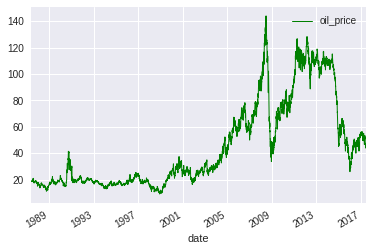

In [5]:
brent[['date','oil_price']].set_index('date').plot(color="green", linewidth=1.0)  

To begin with a more advanced data analysis, we will create a **pairplot using seaborn** to analyse BP share price. 

### 2.2.- Pairplot on BP share price from years 2000 to 2017 using a color gradient for different years

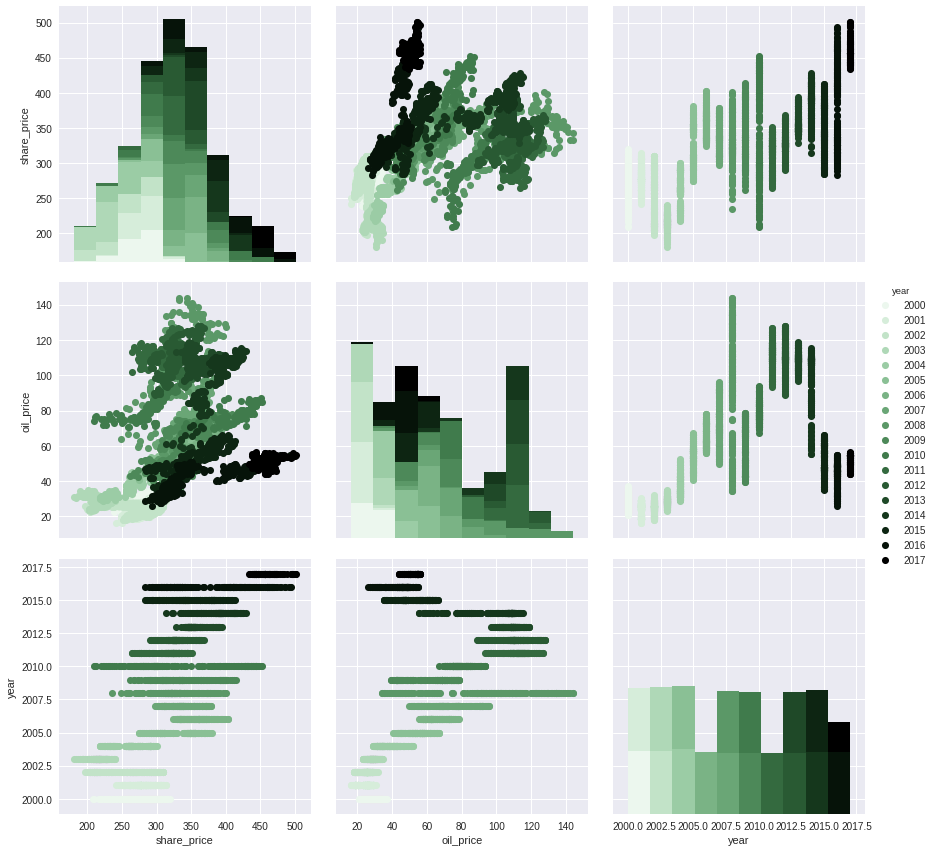

In [6]:
#==============================================================================
# Pairplot using master data table (all_data) with a filter on BP share price
#==============================================================================
palette=sns.cubehelix_palette(18, start=2, rot=0, dark=0, light=.95, reverse=False)
sns.pairplot(all_data[all_data['name']=="BP.L"].drop(["share_price_scaled"],axis=1),
             hue="year",palette=palette,size=4,markers="o",
             plot_kws=dict(s=50, edgecolor="b", linewidth=0))


The **pairplot shows all the pairwise relationships in a dataset and the univariate distribution** of the data for each variable. It gives us a reasonable idea about variable relationships. I have also built a palette with a gradient color with increasing darkness with time. Have a look at the combination of oil price vs BP share price in the top-center plot.  

Firstly, see how it evolves doing a zigzag with both time and oil price. Then see where we are in 2017... **looks like unexplored terrain!** Notice also the differences in distribution simetries comparing the oil price and share prices. Bear in mind this is just a basic analysis on an oil company, with a specific characteristics like size, different events during the last 17 years. Later on we will compare different companies.

Now that we have taken care of making a plot for BP, you can try to do it for the rest of the companies or comparing different types of data.

There is much more information that can be extracted from this plot, but we will stop here and keep going to next step. Lets try to filter in the last five years where we are covering a large spectrum in the oil price and see if we see more. 

### 2.3.- Pairplot on BP share price using last five years

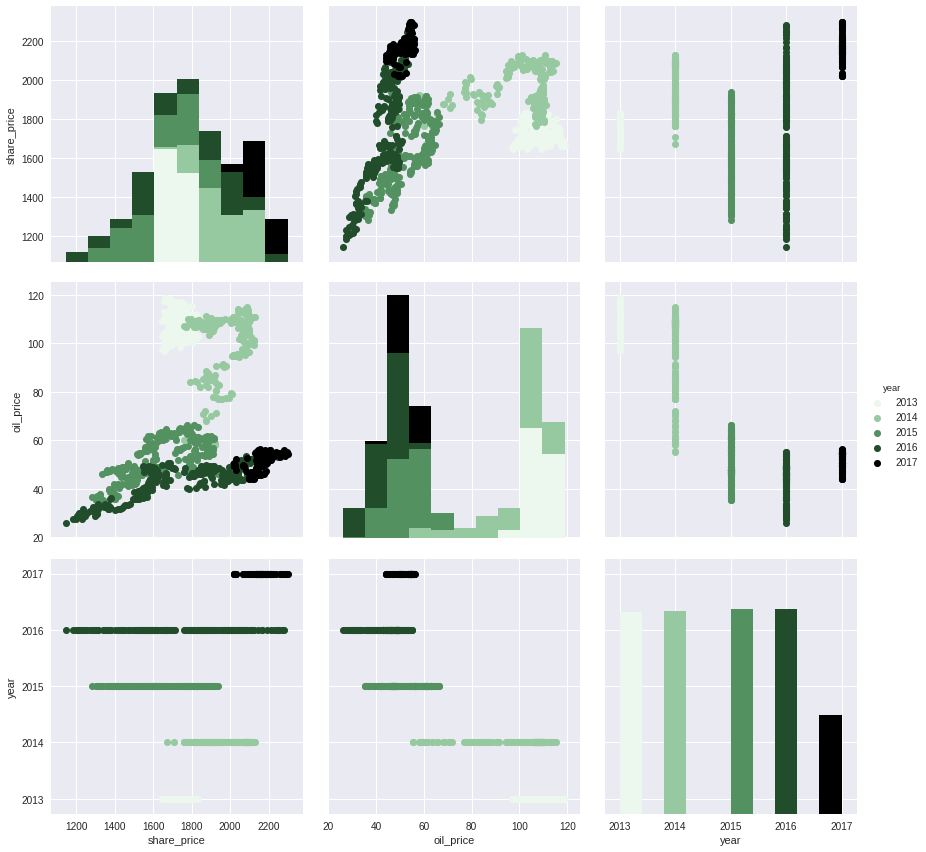

In [7]:
#==============================================================================
# Pairplot on less data 2013 to 2017 using Royal Dutch Shell (LON) stock price
#==============================================================================

# Just for the last 5 years
all_data13=all_data[all_data["year"]>2012]
palette=sns.cubehelix_palette(5, start=2, rot=0, dark=0, light=.95, reverse=False)
sns.pairplot(all_data13[all_data13['name']=="RDSB.L"].drop(["share_price_scaled"],axis=1),
             hue="year",palette=palette,size=4,markers="o",
             plot_kws=dict(s=50, edgecolor="b", linewidth=0))


Ah hah, here we see a bit more. In the last five years the distribution tells us that the oil price have been mostly **swinging in between 30 to 60 usd/bbl and 100 to 120 usd/bbl**. Between 60 and 100 usd/bbl not much data... Also we see a positive with high confidence correlation for years 2016/17 of share price and oil price. Notice, the year when everything changed for this company was 2014, we will see later if that's the case for other companies. In 2014, there is a change in pattern correlations and high variability of data. That was the **boundary between the two worlds**, two market behaviors, a change in regime irrespective of the independent events of the company. Several interpretations can be obtained from this plot. I will not plot this for all the other companies.

## What's next? 

To have a bit of a feeling on how sensitive is the stock of each company to the oil price we will build a few violin plots. This is basically a box plot with the probability density data.

### 2.4.- Violin plot of the oil price

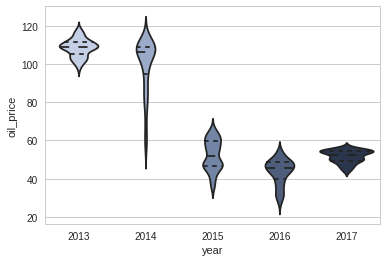

In [8]:
#==============================================================================
# Violin Plot Oil price on last 5 years
#==============================================================================

sns.set_style("whitegrid")
palette=sns.cubehelix_palette(5, start=2.8, rot=0, dark=0.2, light=0.8, reverse=False)

sns.violinplot(x="year", y="oil_price", data=all_data13[all_data13['name']=="RDSB.L"],
               inner="quart", palette=palette, trim=True)


### 2.5.- Violin plot of the share price of several Oil and Gas companies

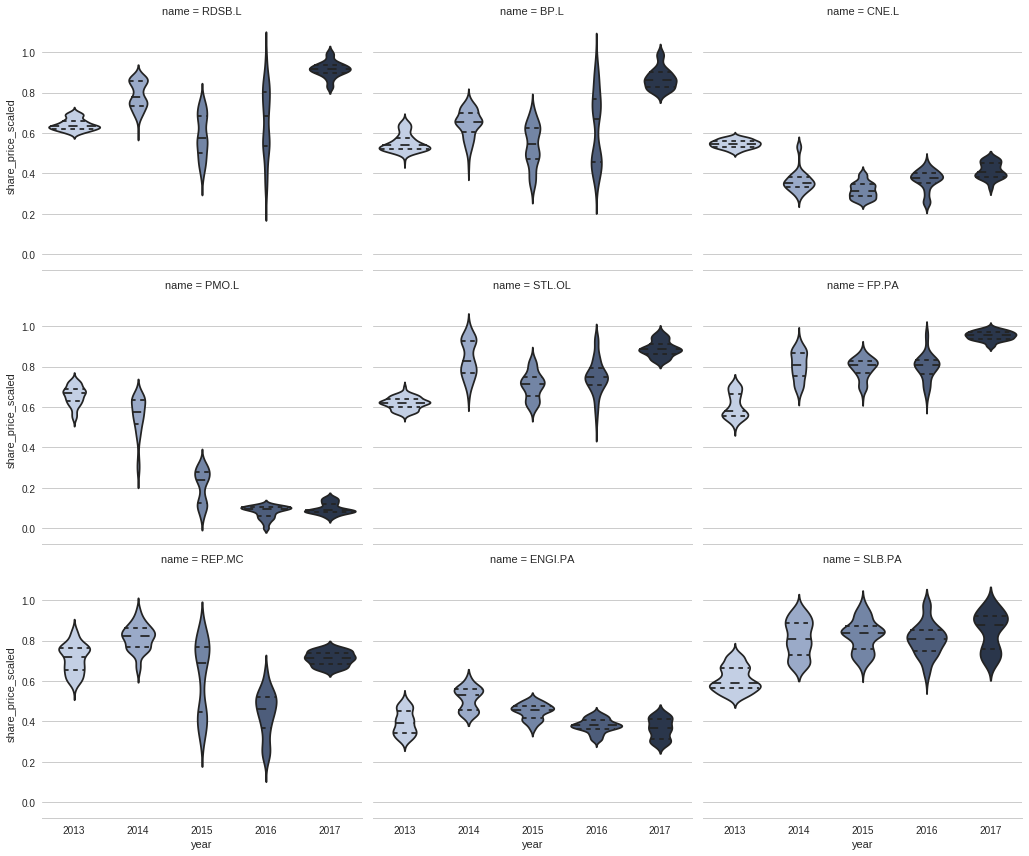

In [9]:
#==============================================================================
# Violin Plot Oil price on last 5 years
#==============================================================================

sns.factorplot(x="year", y="share_price_scaled", col='name', col_wrap=3,kind="violin",
               split=True, data=all_data13,inner="quart", palette=palette, trim=True,size=4,aspect=1.2)
sns.despine(left=True)

Just a quick note on the large range of the oil price during 2014, however the variability in the stock price range and distribution for different companies was different. A few companies were more sensitive than others. Notice that all the stock prices are scaled between 0 and 1 using its max/min values in the last 20 years approx. **That may cause missleading interpretations**. This is just an exercise to do a bit of data analysis using the shape and patterns as a third dimension. 

The next plot is an attempt to **draw two variables with bivariate and univariate graphs**. Just a different way of visualizing data using a jointplot. The example is with Premier Oil share price.

### 2.6.- Jointplot comparison of Premier Oil and Statoil

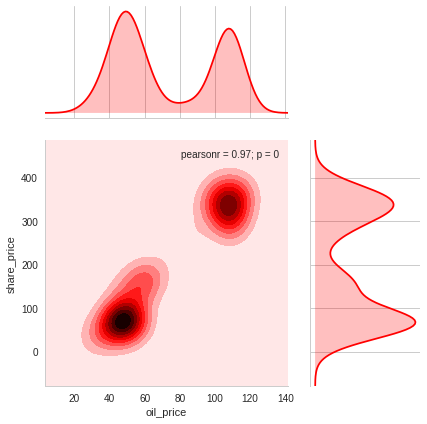

In [10]:
#==============================================================================
# joint plot using 5 years for Premier Oil
#==============================================================================

sns.jointplot("oil_price", "share_price",data=all_data13[all_data13['name']=="PMO.L"],kind="kde",
              hue="year",size=6,ratio=2,color="red").plot_joint(sns.kdeplot, zorder=0, n_levels=20)


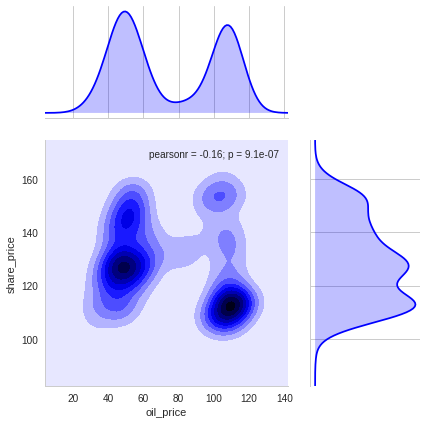

In [11]:
#==============================================================================
# joint plot using 5 years for Statoil
#==============================================================================

sns.jointplot("oil_price", "share_price",data=all_data13[all_data13['name']=="STL.OL"],kind="kde",
              hue="year",size=6,ratio=2,color="blue").plot_joint(sns.kdeplot, zorder=0, n_levels=20)


Notice the difference in share price distribution for the two companies and the shape of the density chart. 

### 2.7.- Plot of oil price vs share price of different companies using different templates

The next analysis will do a grid of charts for all companies to check if we see any patterns.

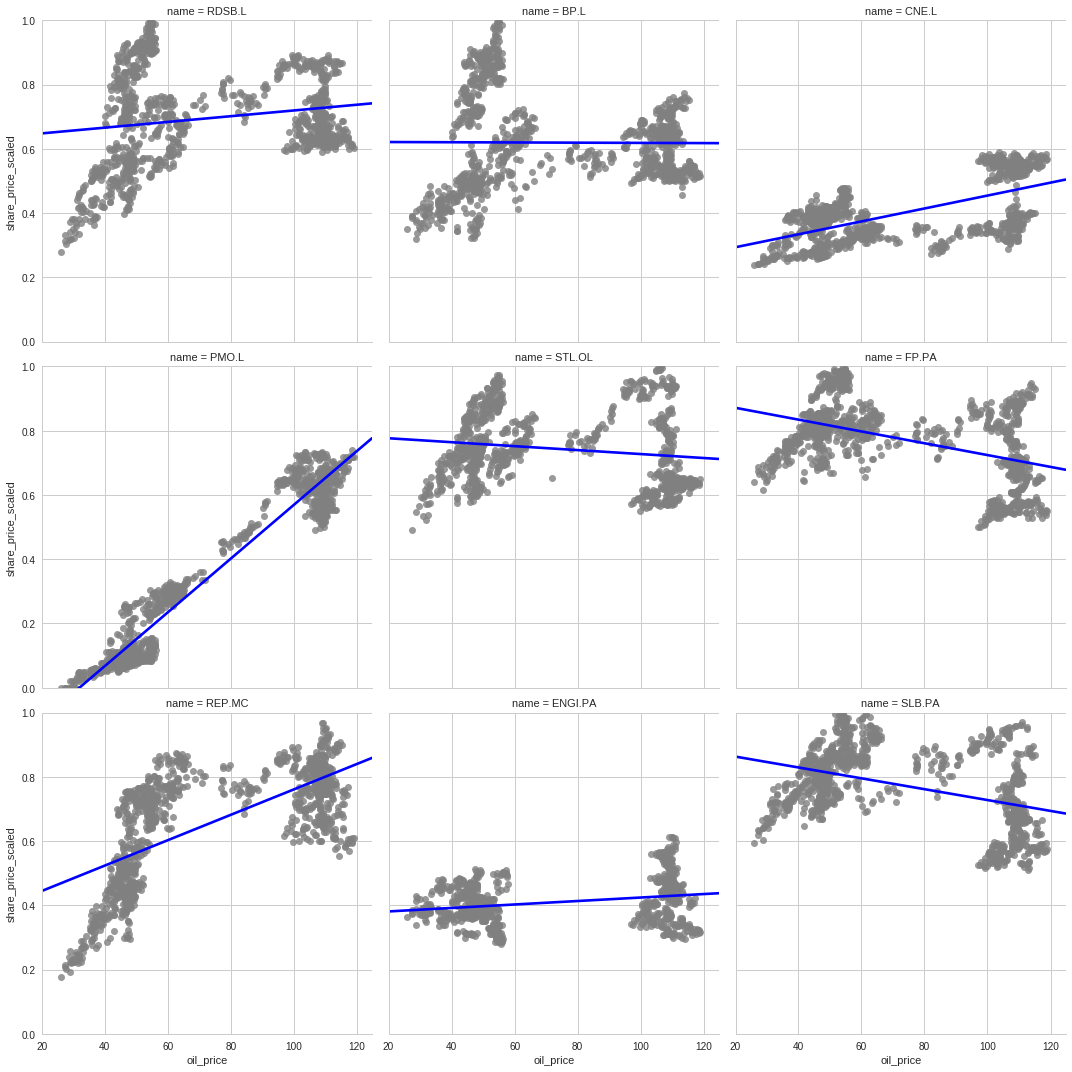

In [12]:
#==============================================================================
# lmplot using using 5 years for all companies
#==============================================================================

sns.lmplot(x="oil_price", y="share_price_scaled", col="name",ci=None, col_wrap=3, 
           data=all_data13, order=1,line_kws={'color': 'blue'},scatter_kws={'color': 'grey'}).set(ylim=(0, 1))


We dont really see that much on that chart. Lets add different colors for each year and see if correlations are telling us anything.

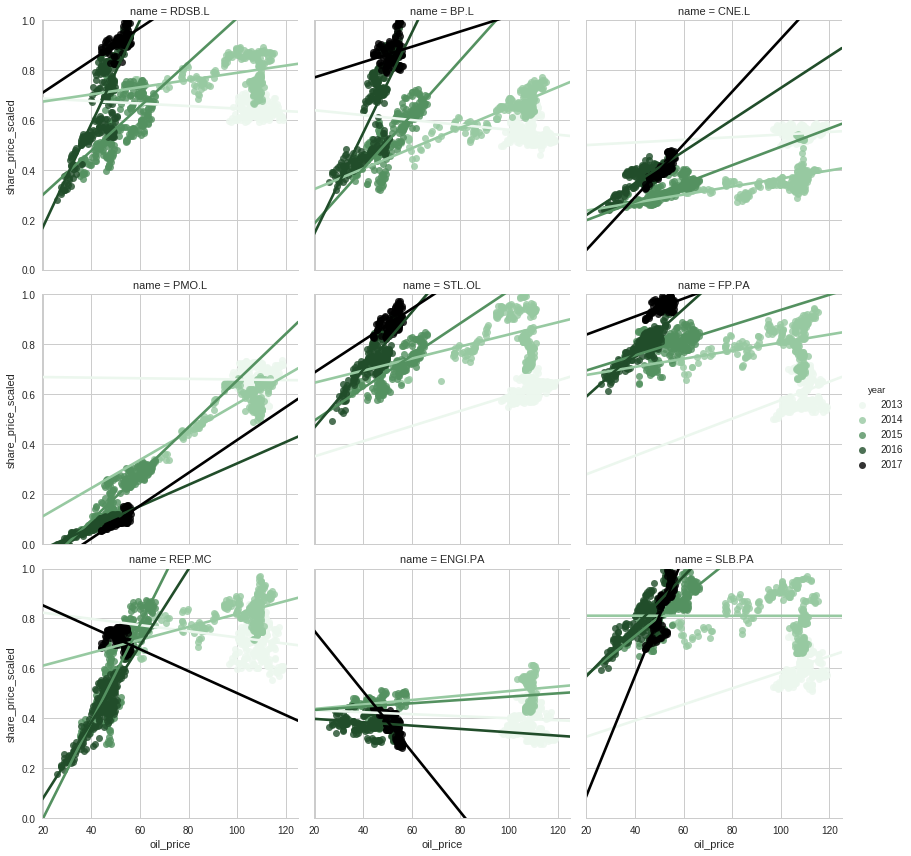

In [13]:
palette=sns.cubehelix_palette(5, start=2, rot=0, dark=0, light=.95, reverse=False)
sns.lmplot(x="oil_price", y="share_price_scaled",hue="year", col="name",ci=None, 
           col_wrap=3, data=all_data13, order=1,palette=palette,size=4).set(ylim=(0, 1))

Interestingly, there are a few patterns that can be easily identified visually in some companies. Is it may be related to company attributes? Some others we can see had different trends for similar range of oil prices but different years. That could be related to the exploration premium a few years back or may other events/facts. I will leave you do the detailed interpretation. In any way, I am sure some of  you will find this chart quite hypnotic.

## 3.- Machine Learning and Prediction

Essentially machine learning is the **application of artificial intelligence to learn** and improve experience without being explicitly programmed. Usually machine learning algorithms can be categorized as **supervised or unsupervised**.

* **Supervised learning** is where you have a few input variables and an output variable. Basically the algorithm is used to "learn" the mapping function from the input to the output. The goal is to minimize the error of the mapping function so when you have new input data you can predict the output variables. Most of the problems in machine learning use supervised learning. As you can imagine, the applications of this algorithms are endless. 

   - Another subclassification of supervised learning problems can be grouped in a classification problem, when the output is a category (i.e. "buy" or "sell") or regression where the output is a real value (i.e. "how much money?" or "speed of car".

* **Unsupervised learning** is where you have only input data and no corresponding output variables. Basically the algorithm is used to model the structure or distribution in the data. A common unsupervised learning problem is clustering, to discover groupings of data or find patterns (i.e. groups of people by purchasing behavior).

Here is an outline of the machine learning problems that we will solve:

    3.1.- Cluster analysis on Shell data
    3.2.- Linear regression on Royal Dutch Shell share price vs oil price
    3.3.- Random Forest on Royal Dutch Shell share price vs oil price

A potential application of this algorithms would be to evaluate the relative value of the share compared to the oil price. Thus, it can give you an indication if the share is *overpriced* or *undervalued*. However, the objective of this exercise is to provide the tools to unlock the potential of Machine Learning in the oil industry. 

### 3.1.- Cluster analysis on Shell data

In the following example we will divide the data from *Royal Dutch Shell* into **6 groups using cluster analysis**. Clustering is the task of grouping a set of objects in such a way that objects in the same group are more similar to each other than to those in other groups. If you want to understand a bit more about clustering, see references.

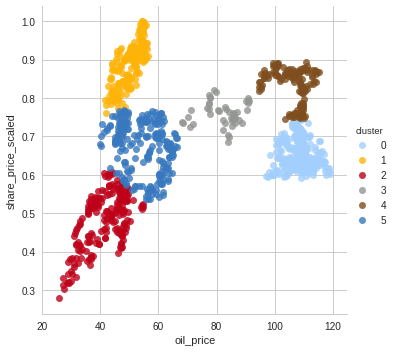

In [14]:
#==============================================================================
# Unsupervised Learning - Cluster analysis on Shell data
#==============================================================================
from sklearn.cluster import KMeans

shell=pd.DataFrame()
shell=all_data13[all_data13['name']=="RDSB.L"]
# We need to scale also oil price, so clustering is not influenced by the relative size of one axis.
shell["oil_price_scaled"]=scaler.fit_transform(shell["oil_price"].to_frame())
shell["cluster"] = KMeans(n_clusters=6, random_state=1).fit_predict(shell[["share_price_scaled","oil_price_scaled"]])

# The 954 most common RGB monitor colors https://xkcd.com/color/rgb/
colors = ["baby blue", "amber", "scarlet", "grey","milk chocolate", "windows blue"]
palette=sns.xkcd_palette(colors)

sns.lmplot(x="oil_price", y="share_price_scaled",ci=None,palette=palette, hue="cluster",fit_reg=0 ,data=shell)


There are many application of practical problems using cluster analysis. In this example we are just using it for data visualization and grouping. 

### 3.2.- Linear regression on Royal Dutch Shell share price vs oil price

Next we will construct a simple linear regression model using supervised learning. The objective is to evaluate the **prediction of data from the last 100 days using data trained from years 2016/17** (excluding test data). Train data is the data used to construct the model and test data is the data we are trying to predict.

In [15]:
#==============================================================================
# Supervised learning linear regression
#==============================================================================

from sklearn import linear_model

# 1.- Data preparation
shell15=pd.DataFrame()
shell15=all_data13[(all_data13['name']=="RDSB.L") & (all_data13['year']>2015 )] # Extract data from years 2016/17
shell15=shell15[["share_price","oil_price"]].reset_index()

# Just using 1 variable for linear regression. To try with more variables use randomforest
# Split the data into training/testing sets
train = shell15[:-100]
test = shell15[-100:]

x_train=train["oil_price"].to_frame() #converts the pandas Series to numpy.ndarray
y_train=train['share_price'].to_frame()
x_test=test["oil_price"].to_frame() #converts the pandas Series to numpy.ndarray
y_test=test['share_price'].to_frame()

# 2.- Create linear regression object
regr = linear_model.LinearRegression()

# 3.- Train the model using the training sets
regr.fit(x_train,y_train)

# The coefficients
print("Coefficients: ",  float(regr.coef_))
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(x_train) - y_train) ** 2))

Coefficients:  35.254081691242774
Mean squared error: 23210.67


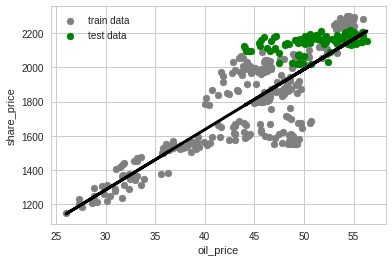

In [16]:
# Plot outputs using matplotlib
plt_train=plt.scatter(x_train, y_train,  color='grey')
plt_test=plt.scatter(x_test, y_test,  color='green')
plt.plot(x_train, regr.predict(x_train), color='black', linewidth=3)
plt.plot(x_test,regr.predict(x_test),  color='black', linewidth=3)
plt.xlabel("oil_price")
plt.ylabel("share_price")
plt.legend((plt_train, plt_test),("train data", "test data"))
plt.show()


In the chart above you can see an approximation of how **Linear Regression** is fit and trying to predict results from test data. It looks like the prediction data is quite off for lower oil prices. The mean square error of this predictive method is 23210.67. Lets see how a more sofisticated method does on this topic. We are going to work using random forest algorithm.

### 3.3.- Random Forest on Royal Dutch Shell share price vs oil price

**Random forest** is an ensemble tool which takes a subset of observations and a subset of variables to build a decision trees. It builds multiple such decision tree and amalgamate them together to get a more accurate and stable prediction.

Random forest algorithm **accepts more than one variable** in the input data to predict the output. It runs very efficiently on large databases, its very accurate, can handle many input variables, it has effective methods for estimating missing data and many more advantages. **The main disadvantage is overfitting** for some tasks or some sets of data. That leads with innacurate predictions. It is also biased in favor of categorical attributes(if used) with more levels. In anycase we are gonna give it a go.

In top of the oil price, we are going to use other variables to predict the share price of Shell. These are going to be the prices of Premier Oil, Cairn Energy, TOTAL and ENGIE. I know this doesn't make much sense, but we just want to see how to construct a model of this type. It will allow us to see the impact of each one on the final prediction.

In [17]:
from sklearn.ensemble import RandomForestRegressor
# 1.- Data Preparation
shell15=pd.DataFrame()
shell15=all_data13[(all_data13['name']=="RDSB.L") & (all_data13['year']>2015 )]
shell15=shell15[["share_price","oil_price"]].reset_index()

# Load share price of other variables
shell15['PMO.L']=all_data13[(all_data13['name']=="PMO.L")][-373:].reset_index()['share_price']
shell15['CNE.L']=all_data13[(all_data13['name']=="CNE.L")][-373:].reset_index()['share_price']
shell15['FP.PA']=all_data13[(all_data13['name']=="FP.PA")][-373:].reset_index()['share_price']
shell15['ENGI.PA']=all_data13[(all_data13['name']=="ENGI.PA")][-373:].reset_index()['share_price']

train = shell15[:-100]
test = shell15[-100:]

x_train=train[["oil_price","PMO.L","CNE.L","FP.PA","ENGI.PA"]]
y_train=train['share_price']

x_test=test[["oil_price","PMO.L","CNE.L","FP.PA","ENGI.PA"]] 
y_test=test['share_price'].to_frame()


# 2.- Create Randomforest object usinig a max depth=5
regressor = RandomForestRegressor(n_estimators=200, max_depth=5 )

# 3.- Train data
clf=regressor.fit(x_train, y_train)

# 4.- Predict!
y_pred=regressor.predict(x_test)
y_pred=pd.DataFrame(y_pred)

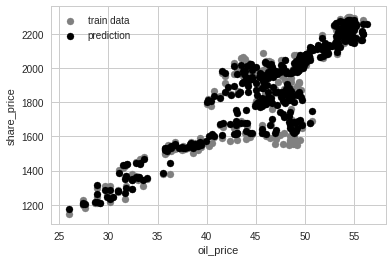

In [18]:
# We are going to have a look at how fitted data looks like:

plt_train=plt.scatter(x_train["oil_price"],y_train,   color='grey')
plt_pred=plt.scatter(shell15["oil_price"], regressor.predict(shell15[["oil_price","PMO.L","CNE.L","FP.PA","ENGI.PA"]]),  color='black')

plt.xlabel("oil_price")
plt.ylabel("share_price")
plt.legend((plt_train,plt_pred),("train data","prediction"))
plt.show()

The model looks really good just predicting the training data. Probably with quite a bit of **overfitting**. There are many parameters to tune, but a key one is max depth. This will provide the depth of the trees. The higher the number the more overfitting you will have, depending on the type of data. We will have a look now to how this model predicts or test data.

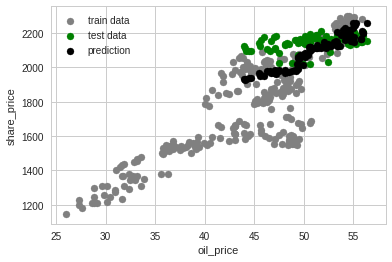

In [19]:
plt_train=plt.scatter(x_train["oil_price"],y_train,   color='grey')
plt_test=plt.scatter(x_test["oil_price"],y_test,   color='green')
plt_pred=plt.scatter(x_test["oil_price"], y_pred,  color='black')

plt.xlabel("oil_price")
plt.ylabel("share_price")
plt.legend((plt_train, plt_test,plt_pred),("train data", "test data","prediction"))
plt.show()

In [20]:
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regressor.predict(x_train) - y_train) ** 2))


Mean squared error: 2661.50


The prediction on the test data looks much better now, still somehow innacurate for lower oil price environment. If you see the mean squared error, we manage to reduce the error from 23210 to 2709. That is **10 times lower than using linear regression**. 

It is always worth to give it a check to the importance of each parameter:

Feature ranking:
Feature oil_price (0.238305)
Feature PMO.L (0.039363)
Feature CNE.L (0.114220)
Feature FP.PA (0.524850)
Feature ENGI.PA (0.083262)


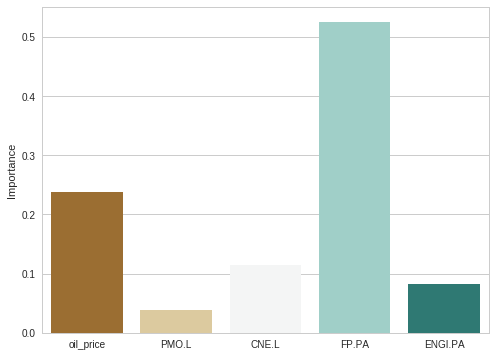

In [21]:
importances=regressor.feature_importances_

indices=list(x_train)
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("Feature %s (%f)" % (indices[f], importances[f]))

f, (ax1) = plt.subplots(1, 1, figsize=(8, 6), sharex=True)
sns.barplot(indices, importances, palette="BrBG", ax=ax1)
ax1.set_ylabel("Importance")

It's interesting to see how the importance of the share price of TOTAL is higher than the oil price. This is mostly because they are similar size companies that behave in a similar way.

Just as a summary, you have now the tools to start your own little project or even to understand how this works. Through this article, I hope I have helped you to start thinking more on how you can unlock the value of machine learning in your area.


Javier Bravo



# References:

**Notebook with full code**: https://www.kaggle.com/javierbravo/a-tour-of-the-oil-industry/

**Oil price dataset downloaded from the U.S Energy Information administration.** ( https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=PET&s=rbrte&f=D)

**Share Prices To download the dataset I use Yahoo finance**. The following link is an example to download Royal Dutch Shell share price dataset: https://uk.finance.yahoo.com/quote/RDSB.L/history?period1=946684800&period2=1499122800&interval=1d&filter=history&frequency=1d

**Pandas**: https://pandas.pydata.org/pandas-docs/stable/10min.html

**Seaborn**: https://seaborn.pydata.org/

**Scikit Learn**: http://scikit-learn.org/stable/

**Cluster analysis** - Basic concepts and algorithms https://www-users.cs.umn.edu/~kumar/dmbook/ch8.pdf